In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Fish.csv')

# Data Preprocessing

In [3]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [4]:
dataset.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
dataset['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Species"] = le.fit_transform(dataset["Species"])

In [7]:
x = dataset.iloc[:,2:7].values
y = dataset.iloc[:,1].values
z = dataset.iloc[:,0].values
x.shape

(159, 5)

In [8]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(z.reshape(-1,1)).toarray()

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
x = np.concatenate((z,x),axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
x_train.shape

(127, 12)

In [12]:
x_test.shape

(32, 12)

In [13]:
y_train.shape

(127,)

In [14]:
y_test.shape

(32,)

# Decision Tree Regression

In [15]:
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [16]:
ydtr = dtr.predict(x_test)

In [17]:
ydtr

array([ 430. ,  110. ,  145. ,  145. ,  514. , 1015. ,  685. ,  345. ,
        950. ,  110. ,  345. ,  500. ,  820. , 1100. ,   51.5,   87. ,
        150. , 1550. ,  110. ,  725. ,   51.5,  500. ,  130. , 1550. ,
         69. ,  450. ,  725. ,  300. , 1015. ,    8.7,  700. ,  120. ])

In [18]:
y_test

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ])

In [19]:
from sklearn.metrics import r2_score
accuracy_dtr = r2_score(y_test,ydtr)

In [20]:
accuracy_dtr

0.9724345073124595

In [21]:
from sklearn import tree
tree.export_graphviz(dtr)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[11] <= 5.154\\nmse = 109760.449\\nsamples = 127\\nvalue = 379.797"] ;\n1 [label="X[9] <= 27.95\\nmse = 23738.766\\nsamples = 90\\nvalue = 199.347"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[9] <= 21.15\\nmse = 4216.47\\nsamples = 56\\nvalue = 98.843"] ;\n1 -> 2 ;\n3 [label="X[10] <= 4.368\\nmse = 967.265\\nsamples = 25\\nvalue = 35.328"] ;\n2 -> 3 ;\n4 [label="X[10] <= 3.23\\nmse = 118.502\\nsamples = 17\\nvalue = 15.571"] ;\n3 -> 4 ;\n5 [label="X[11] <= 1.644\\nmse = 17.611\\nsamples = 14\\nvalue = 10.907"] ;\n4 -> 5 ;\n6 [label="X[8] <= 10.9\\nmse = 5.167\\nsamples = 12\\nvalue = 9.425"] ;\n5 -> 6 ;\n7 [label="X[9] <= 9.8\\nmse = 0.337\\nsamples = 4\\nvalue = 6.775"] ;\n6 -> 7 ;\n8 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.9"] ;\n7 -> 8 ;\n9 [label="X[11] <= 1.154\\nmse = 0.109\\nsamples = 3\\nvalue = 7.067"] ;\n7 -> 9 ;\n10 [label="X[7] <= 9.7\\nmse = 0.023\\nsamples = 2\\nvalue = 6.85"] ;\n9 -> 1

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


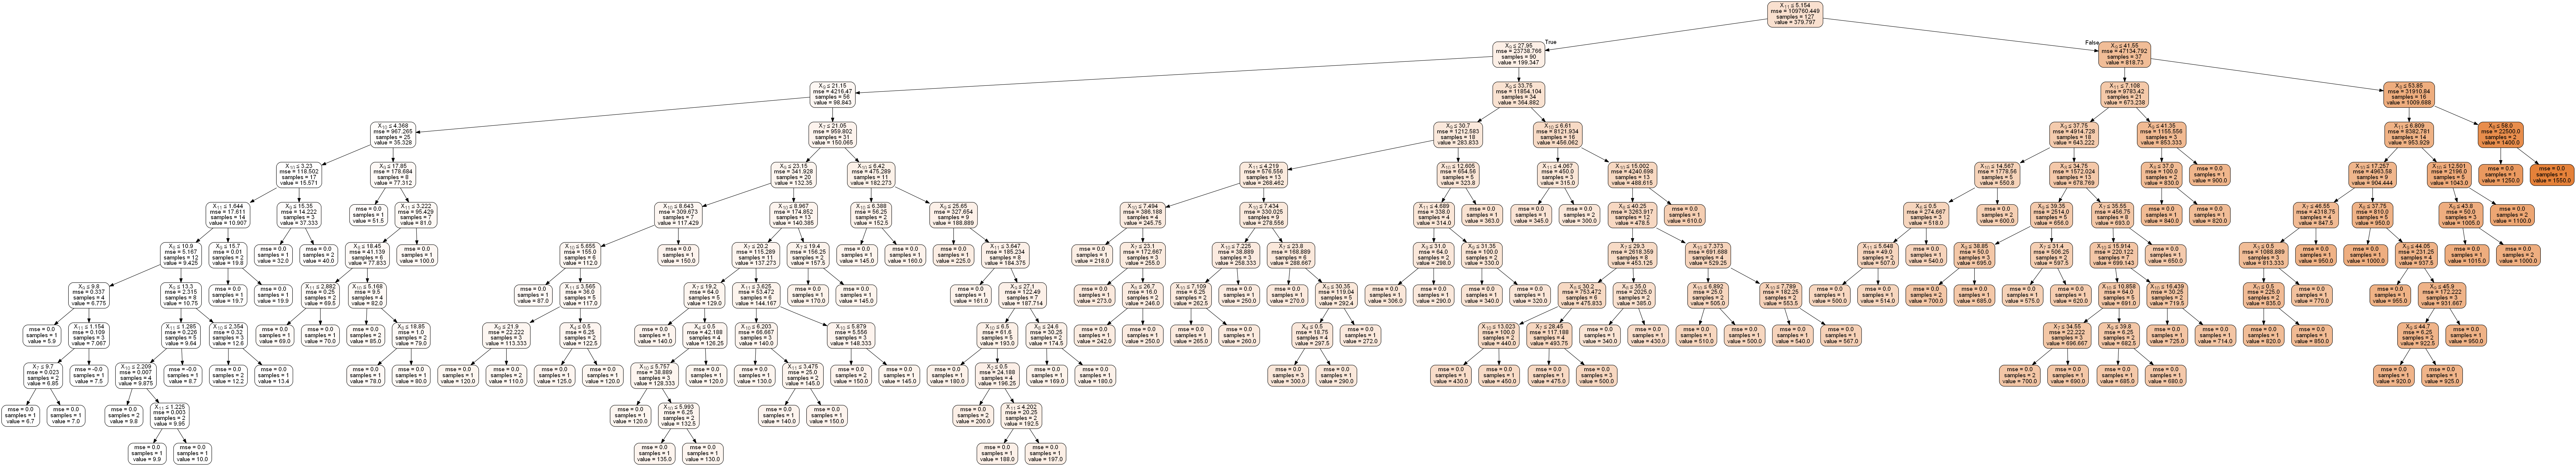

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(n_estimators =30,random_state = 0)
rdr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [24]:
yrdr = rdr.predict(x_test)

In [25]:
accuracy_rdr = r2_score(y_test,yrdr)

In [26]:
accuracy_rdr

0.9629611023098777